In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1000G Dataset

### Getting the data from the plink results from the PCA

In [3]:
FOLDER_1000G = 'data/1000G/'

In [5]:
pca_data = pd.read_csv(FOLDER_1000G + 'chr22_pca.eigenvec', delim_whitespace=True, header=None)
pca_data.columns = ['FID', 'IID'] + [f'PC{i}' for i in range(1, pca_data.shape[1] - 2 + 1)]
pca_data

/tmp/ipykernel_323659/4007640162.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  pca_data = pd.read_csv(FOLDER_1000G + 'chr22_pca.eigenvec', delim_whitespace=True, header=None)


,FID,IID,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,...,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,HG00096,HG00096,-0.008192,-0.027508,-0.004923,0.033624,-0.008262,0.015741,0.007310,-0.026297,...,0.040320,0.016726,-0.004103,0.022555,0.004507,0.008274,-0.002454,0.024233,-0.021228,-0.040528
1,HG00097,HG00097,-0.011085,-0.023776,-0.002549,0.019998,-0.008330,-0.008068,-0.002265,-0.003638,...,-0.037168,-0.013325,-0.022385,0.031882,0.037891,0.015135,-0.026242,-0.023876,0.023655,0.003990
2,HG00099,HG00099,-0.008883,-0.026156,-0.008538,0.013499,0.000508,0.006662,0.000264,-0.013594,...,-0.026542,0.016867,0.010385,-0.005661,-0.004618,-0.023956,-0.000925,0.047797,0.052544,-0.024495
3,HG00100,HG00100,-0.008679,-0.029335,-0.005116,0.033300,-0.014145,-0.033258,0.012861,0.005678,...,-0.006777,-0.006181,0.011917,-0.024859,0.044737,-0.000512,0.004074,-0.024026,-0.023367,0.021925
4,HG00101,HG00101,-0.008517,-0.022802,0.006508,0.015581,0.014226,-0.028508,-0.013142,0.020138,...,0.016545,-0.027703,0.013902,-0.009346,0.014038,0.035410,0.052832,-0.002020,-0.022596,-0.008187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2499,NA21137,NA21137,-0.009903,-0.003319,-0.022633,-0.031416,-0.031209,0.017633,-0.019890,-0.011256,...,-0.018998,-0.002642,0.020247,-0.002083,-0.010937,0.007855,-0.001162,0.029590,-0.023158,0.006221
2500,NA21141,NA21141,-0.012704,-0.004967,-0.031504,-0.034469,-0.043909,-0.038629,-0.020278,-0.015519,...,-0.019184,0.000933,-0.003053,-0.020673,-0.013703,0.004317,0.040425,-0.001073,-0.024797,0.011084
2501,NA21142,NA21142,-0.010287,-0.003867,-0.020955,-0.036154,-0.005402,-0.002928,0.013484,0.034520,...,0.015156,0.002279,-0.041062,-0.010845,-0.017429,-0.024136,-0.003129,0.026873,-0.029830,-0.012527
2502,NA21143,NA21143,-0.008444,-0.002415,-0.032674,-0.040494,0.004403,-0.042751,0.013683,0.023466,...,0.028479,-0.002857,-0.061001,-0.021741,0.025810,-0.025347,-0.031114,0.027142,0.012937,0.019382


In [9]:
sample_info = pd.read_csv(FOLDER_1000G + 'integrated_call_samples_v3.20130502.ALL.panel', sep='\t', header=0)
sample_info

,sample,pop,super_pop,gender
0,HG00096,GBR,EUR,male
1,HG00097,GBR,EUR,female
2,HG00099,GBR,EUR,female
3,HG00100,GBR,EUR,female
4,HG00101,GBR,EUR,male
...,...,...,...,...
2499,NA21137,GIH,SAS,female
2500,NA21141,GIH,SAS,female
2501,NA21142,GIH,SAS,female
2502,NA21143,GIH,SAS,female


In [11]:
pca_1000G_df = pd.merge(pca_data, sample_info, left_on='IID', right_on='sample', how='inner')
pca_1000G_df

,FID,IID,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,...,PC15,PC16,PC17,PC18,PC19,PC20,sample,pop,super_pop,gender
0,HG00096,HG00096,-0.008192,-0.027508,-0.004923,0.033624,-0.008262,0.015741,0.007310,-0.026297,...,0.004507,0.008274,-0.002454,0.024233,-0.021228,-0.040528,HG00096,GBR,EUR,male
1,HG00097,HG00097,-0.011085,-0.023776,-0.002549,0.019998,-0.008330,-0.008068,-0.002265,-0.003638,...,0.037891,0.015135,-0.026242,-0.023876,0.023655,0.003990,HG00097,GBR,EUR,female
2,HG00099,HG00099,-0.008883,-0.026156,-0.008538,0.013499,0.000508,0.006662,0.000264,-0.013594,...,-0.004618,-0.023956,-0.000925,0.047797,0.052544,-0.024495,HG00099,GBR,EUR,female
3,HG00100,HG00100,-0.008679,-0.029335,-0.005116,0.033300,-0.014145,-0.033258,0.012861,0.005678,...,0.044737,-0.000512,0.004074,-0.024026,-0.023367,0.021925,HG00100,GBR,EUR,female
4,HG00101,HG00101,-0.008517,-0.022802,0.006508,0.015581,0.014226,-0.028508,-0.013142,0.020138,...,0.014038,0.035410,0.052832,-0.002020,-0.022596,-0.008187,HG00101,GBR,EUR,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2499,NA21137,NA21137,-0.009903,-0.003319,-0.022633,-0.031416,-0.031209,0.017633,-0.019890,-0.011256,...,-0.010937,0.007855,-0.001162,0.029590,-0.023158,0.006221,NA21137,GIH,SAS,female
2500,NA21141,NA21141,-0.012704,-0.004967,-0.031504,-0.034469,-0.043909,-0.038629,-0.020278,-0.015519,...,-0.013703,0.004317,0.040425,-0.001073,-0.024797,0.011084,NA21141,GIH,SAS,female
2501,NA21142,NA21142,-0.010287,-0.003867,-0.020955,-0.036154,-0.005402,-0.002928,0.013484,0.034520,...,-0.017429,-0.024136,-0.003129,0.026873,-0.029830,-0.012527,NA21142,GIH,SAS,female
2502,NA21143,NA21143,-0.008444,-0.002415,-0.032674,-0.040494,0.004403,-0.042751,0.013683,0.023466,...,0.025810,-0.025347,-0.031114,0.027142,0.012937,0.019382,NA21143,GIH,SAS,female


### Plotting the PCA results

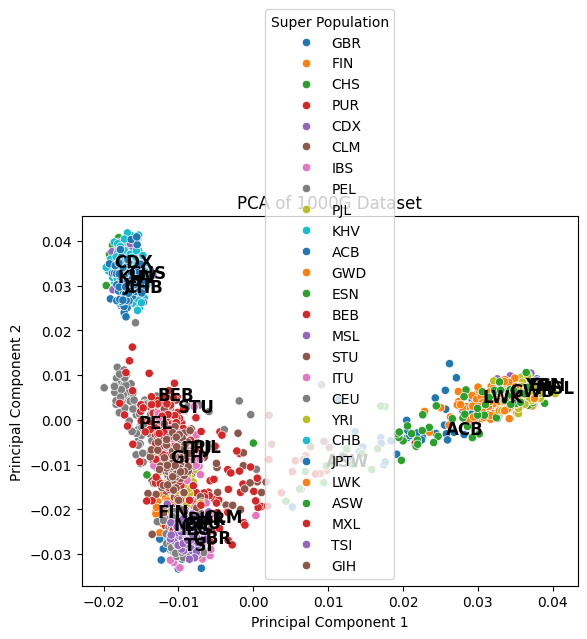

In [15]:
unique_super_pop = pca_1000G_df.drop_duplicates(subset='super_pop')
sns.scatterplot(data=pca_1000G_df, x='PC1', y='PC2', hue='super_pop', palette='tab10')
for i, row in unique_super_pop.iterrows():
    plt.text(row['PC1'], row['PC2'], row['super_pop'], fontsize=12, weight='bold')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of 1000G Dataset')
plt.legend(title='Super Population')
plt.show()